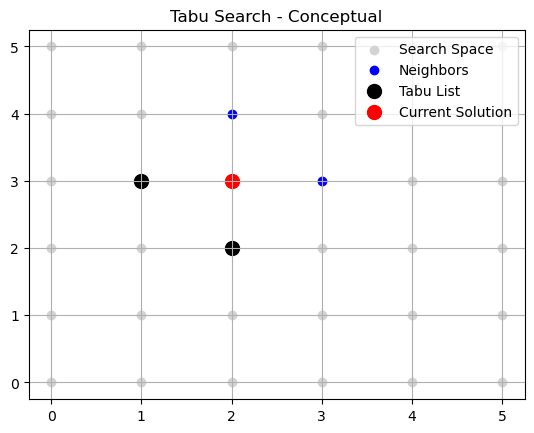

In [1]:
# Tabu Search 

import matplotlib.pyplot as plt

current = [2,3]
neighbors = [[2,4],[3,3],[2,2],[1,3]]
tabu = [[1,3],[2,2]]

plt.scatter([0,1,2,3,4,5]*6,[i for i in range(6) for _ in range(6)], color='lightgrey', label='Search Space')
plt.scatter([n[0] for n in neighbors], [n[1] for n in neighbors], color='blue', label='Neighbors')
plt.scatter([t[0] for t in tabu], [t[1] for t in tabu], color='black', s=100, label='Tabu List')
plt.scatter(current[0], current[1], color='red', s=100, label='Current Solution')

plt.title("Tabu Search - Conceptual")
plt.legend()
plt.grid(True)
plt.show()


### Conceptual / Classroom Version
- **Purpose:** Shows the idea of neighborhood search and tabu list.  
- **Red point:** Current solution.  
- **Blue points:** Neighboring solutions under consideration.  
- **Black points:** Tabu list (temporarily prohibited solutions).  
- **Note:** Static; no iterative improvement logic.

In [2]:
import numpy as np
import plotly.graph_objects as go

num_iterations = 20
current = np.array([2,3])
tabu_list = []

frames = []

for it in range(num_iterations):
    neighbors = [current + np.array([dx,dy]) for dx,dy in [[0,1],[1,0],[-1,0],[0,-1]]]
    neighbors = [n for n in neighbors if 0<=n[0]<=5 and 0<=n[1]<=5 and list(n) not in tabu_list]
    next_solution = neighbors[np.random.randint(len(neighbors))]
    tabu_list.append(list(current))
    if len(tabu_list) > 4:
        tabu_list.pop(0)
    current = np.array(next_solution)

    frames.append(go.Frame(
        data=[go.Scatter(x=[current[0]], y=[current[1]], mode='markers', marker=dict(color='red', size=12),
                         name='Current'),
              go.Scatter(x=[n[0] for n in neighbors], y=[n[1] for n in neighbors],
                         mode='markers', marker=dict(color='blue', size=10), name='Neighbors'),
              go.Scatter(x=[t[0] for t in tabu_list], y=[t[1] for t in tabu_list],
                         mode='markers', marker=dict(color='black', size=10), name='Tabu List')]
    ))

fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(title='Tabu Search - Simulation',
                     xaxis=dict(range=[0,5]), yaxis=dict(range=[0,5]),
                     updatemenus=[dict(type='buttons',
                                       showactive=False,
                                       buttons=[dict(label='Play',
                                                     method='animate',
                                                     args=[None, {"frame":{"duration":300,"redraw":True},
                                                                  "fromcurrent":True}])])])
)
fig.frames = frames
fig.show()


### Realistic / Simulation Version
- **Purpose:** Simulates TS iterations, moving current solution, updating tabu list dynamically.  
- **Red point:** Current solution moving iteratively.  
- **Blue points:** Current neighborhood in each iteration.  
- **Black points:** Tabu list dynamically updated.  
- **Animation:** Shows how TS explores the search space while avoiding tabu solutions.